In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.drop("CustomerID", axis=1, inplace=True)

In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

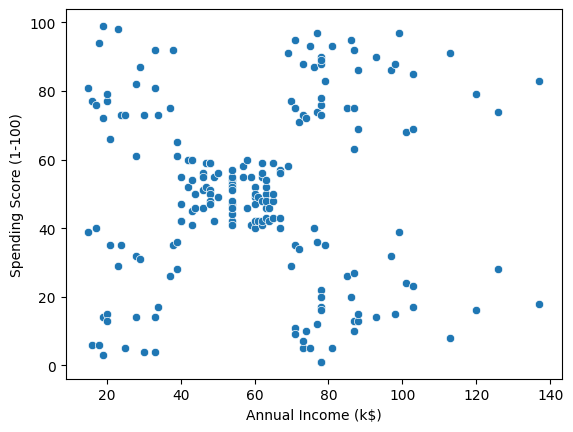

In [8]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)", data=df)

<Axes: xlabel='Genre', ylabel='count'>

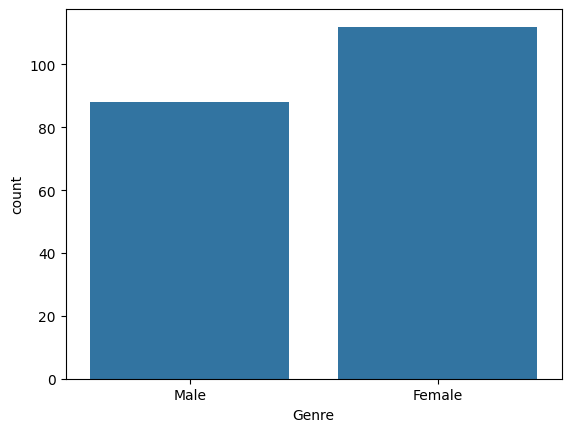

In [9]:
sns.countplot(x="Genre", data=df)

In [10]:
df["Genre"].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

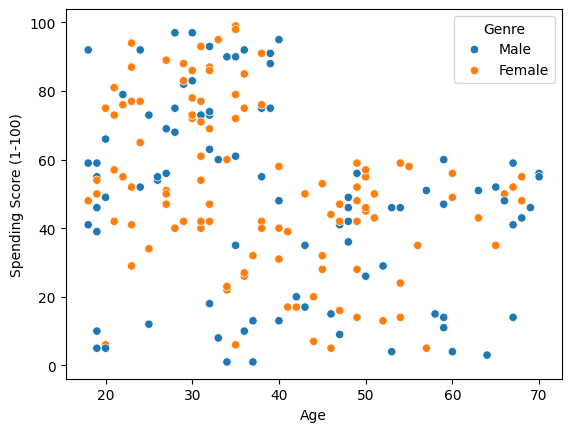

In [11]:
sns.scatterplot(x="Age",y="Spending Score (1-100)", data=df, hue="Genre")

<Axes: xlabel='Genre', ylabel='Spending Score (1-100)'>

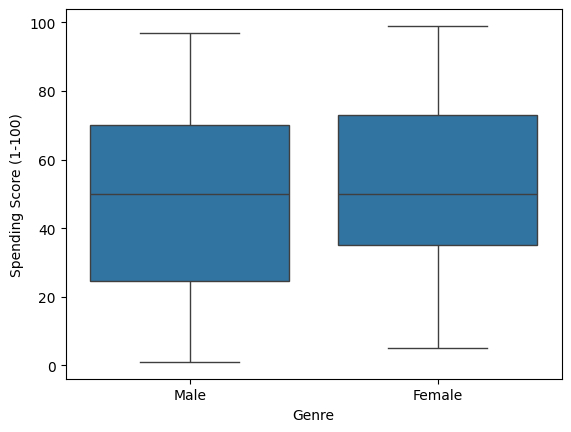

In [12]:
sns.boxplot(x=df['Genre'], y=df['Spending Score (1-100)'])

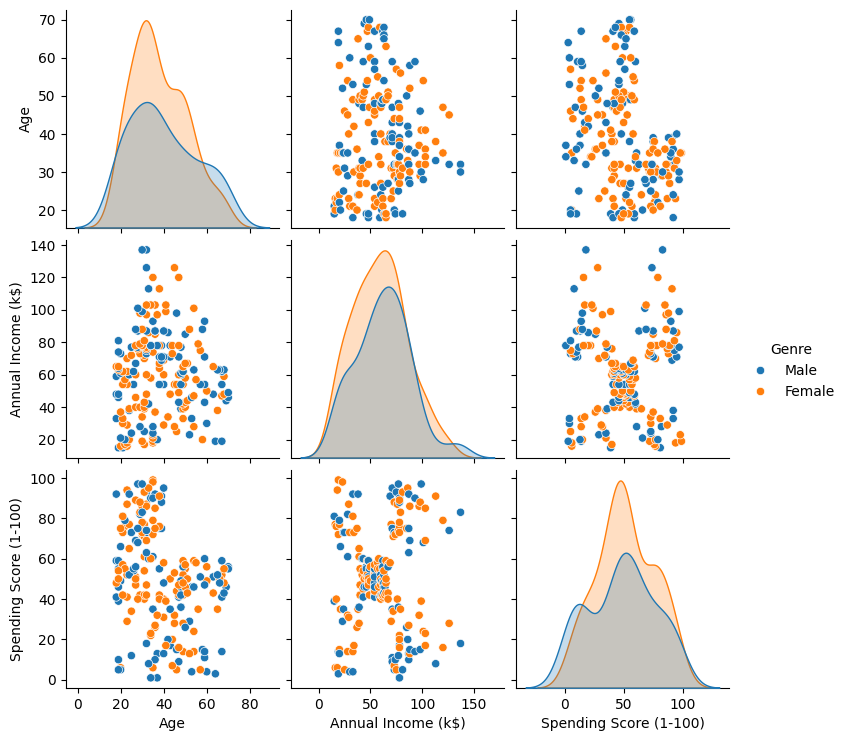

In [13]:
sns.pairplot(df, hue="Genre")

In [14]:
df = pd.get_dummies(df, drop_first=True)

In [15]:
df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
Age,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,-0.058109
Genre_Male,0.060867,0.056410,-0.058109,1.000000


<Axes: >

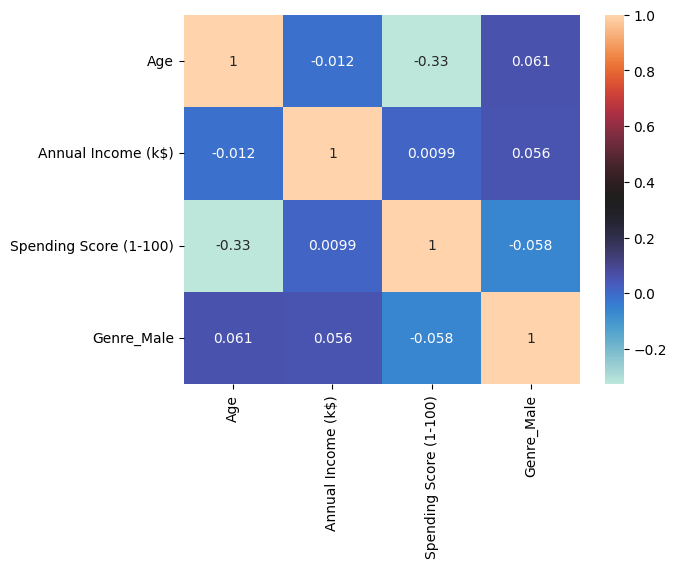

In [16]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="icefire")

---
## Modelleme

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [19]:
scaled_df

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
percent_Value = []

for eps in np.arange(0.01,4,0.01):
    
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(scaled_df)
    
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    percent_Value.append(perc_outliers)

In [ ]:
sns.lineplot(x=np.arange(0.01,4,0.01),y=percent_Value)
plt.ylabel("Outlier %")
plt.xlabel("Epsilon")

plt.xlim(1,1.5)
plt.ylim(0,10)